<a href="https://colab.research.google.com/github/cyprianoeduardo/MAB760_Computational_Linear_Algebra/blob/master/2019_06_04_Apresenta%C3%A7%C3%A3o_%C3%81lgebra_Linear_Computacional_Jo%C3%A3o_Paix%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redução de Dimensionalidade e Recomendação de Filmes.

Autor: Eduardo de Souza Cypriano.

Apresentação sobre os temas de Redução de Dimensionalidade e Recomendação de Filmes, conforme solicitação e conhecimentos adquiridos através da disciplina de Álgebra Linear Computacional, no PPGI-UFRJ.

# Introdução

Dado um título de um filme, utilizaremos o método SVD(Single Value Decomposition) aprendido na disciplina, para recomendar filmes baseados nas classificações de usuários. Utilizaremos a base de dados *MovieLens 1M*, que consiste em aproximadamente 1 milhão de classificações de 4000 filmes, realizados por 6000 usuários.(1)

# Recomendador de filmes usando SVD(2)

In [0]:
#@title Importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#@title Importando as bases de dados `ratings.dat` e `movies.dat`, do [Dataset MovieLens 1M](https://grouplens.org/datasets/movielens/1m/)

data = pd.io.parsers.read_csv('/content/ratings.dat', 
    names=['user_id', 'movie_id', 'rating', 'time'],
    engine='python', delimiter='::')
movie_data = pd.io.parsers.read_csv('/content/movies.dat',
    names=['movie_id', 'title', 'genre'],
    engine='python', delimiter='::')

In [0]:
#@title Analisando a tabela `data`

data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [0]:
#@title Analisando a tabela `movie_data`

movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#@title Criando a matriz de classificações (f × u), sendo linhas como filmes e colunas como usuários

ratings_mat = np.ndarray(
    shape=(np.max(data.movie_id.values), np.max(data.user_id.values)),
    dtype=np.uint8)
ratings_mat[data.movie_id.values-1, data.user_id.values-1] = data.rating.values

In [0]:
#@title Normalizando a matriz, subtraindo a média da mesma

normalised_mat = ratings_mat - np.asarray([(np.mean(ratings_mat, 1))]).T

In [0]:
#@title Calculando o SVD

A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
U, S, V = np.linalg.svd(A)

In [0]:
#@title Calculando a similaridade de cosseno, classificando os mais similares e retornando o maior

def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 # Movie id starts from 1
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

# Helper function to print top N similar movies
def print_similar_movies(movie_data, movie_id, top_indexes):
    print('Recomendações para {0}: \n'.format(
    movie_data[movie_data.movie_id == movie_id].title.values[0]))
    for id in top_indexes + 1:
        print(movie_data[movie_data.movie_id == id].title.values[0])

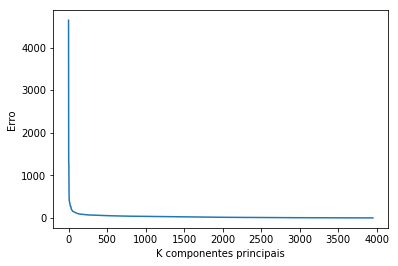

In [0]:
#@title Analisando a quantidade de componentes principais (`k`) adequados

df=pd.DataFrame({'xvalues': list(range(len(S))), 'yvalues': S })
 
plt.plot( 'xvalues', 'yvalues', data=df)
#plt.axis([0, len(S), 0, 6])
plt.xlabel("K componentes principais")
plt.ylabel("Erro")
plt.show()

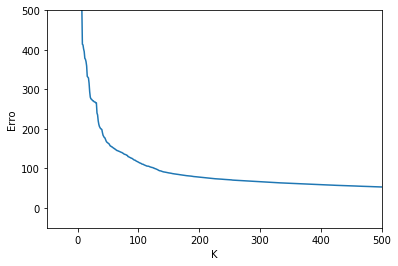

In [0]:
#@title Visualizando a região mais próxima à inflexão

df=pd.DataFrame({'xvalues': list(range(len(S))), 'yvalues': S })
 
plt.plot( 'xvalues', 'yvalues', data=df)
plt.axis([-50, 500, -50, 500])
plt.xlabel("K")
plt.ylabel("Erro")
plt.show()

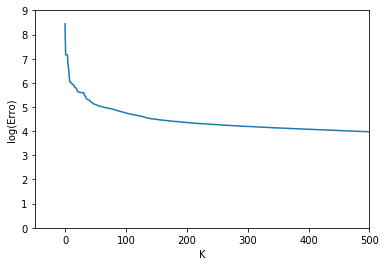

In [0]:
#@title Visualizando o erro através de uma função logarítmica
df=pd.DataFrame({'xvalues': list(range(len(S))), 'yvalues': np.log(S) })
 
plt.plot( 'xvalues', 'yvalues', data=df)
plt.axis([-50, 500, 0, 9])
plt.xlabel("K")
plt.ylabel("log(Erro)")
plt.show()

In [0]:
#@title Definindo os `k` componentes principais para representar os filmes, um `movie_id` para encontrar recomendações e imprimir os `top_n` primeiros resultados

k = 75
movie_id = 1 # Grab an id from movies.dat
top_n = 10

sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)
print_similar_movies(movie_data, movie_id, indexes)

Recomendações para Toy Story (1995): 

Toy Story (1995)
Babe (1995)
Aladdin (1992)
Beauty and the Beast (1991)
Toy Story 2 (1999)
Monty Python and the Holy Grail (1974)
Groundhog Day (1993)
Sword in the Stone, The (1963)
Austin Powers: International Man of Mystery (1997)
Lion King, The (1994)


In [0]:
#@title Analisando o comportamento utilizando os 10 componentes principais

k = 10
movie_id = 1 # Grab an id from movies.dat
top_n = 10

sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)
print_similar_movies(movie_data, movie_id, indexes)

Recomendações para Toy Story (1995): 

Toy Story (1995)
Speed (1994)
Armageddon (1998)
Amadeus (1984)
Wayne's World (1992)
Get Shorty (1995)
Austin Powers: International Man of Mystery (1997)
Princess Bride, The (1987)
Godfather: Part II, The (1974)
Batman Returns (1992)


In [0]:
#@title Analisando o comportamento utilizando os 500 componentes principais

k = 500
movie_id = 1 # Grab an id from movies.dat
top_n = 10

sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)
print_similar_movies(movie_data, movie_id, indexes)

Recomendações para Toy Story (1995): 

Toy Story (1995)
Toy Story 2 (1999)
Aladdin (1992)
Armageddon (1998)
Brady Bunch Movie, The (1995)
Following (1998)
There's Something About Mary (1998)
Duoluo tianshi (1995)
Get Shorty (1995)
Pinocchio (1940)


# Referências


1.   GROUPLENS. MovieLens 1M Dataset | GroupLens. Disponível em: <https://grouplens.org/datasets/movielens/1m/>. Acesso em: 3 jun 2019. 
2.   QUEK, Alyssa. Simple Movie Recommender Using SVD | Alyssa. Disponível em: https://alyssaq.github.io/2015/20150426-simple-movie-recommender-using-svd/. Acesso em: 8 maio 2019.
4.   KLEIN, Philip N. Coding the Matrix: Linear Algebra through Computer Science Applications. [S.l.]: Newtonian Press, 2013. 
5.   SHLENS, Jonathon. A Tutorial on Principal Component Analysis. 3 Abr 2014. Disponível em: <http://arxiv.org/abs/1404.1100>. Acesso em: 3 jun 2019.

# Obrigado!

![alt text](https://4.bp.blogspot.com/-fRLYrN8Ihbs/Tnod3NQLltI/AAAAAAAAANM/Jo8zY5YwNAE/s1600/xkcd435.png)